In [474]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [475]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
sns.set_color_codes()
sns.set_style('white')

In [476]:
from clumpy.datasets import fetch_cars
dataset = fetch_cars()
dataset.drop(['name'], axis=1, inplace=True)
dataset.head(10)

,economy (mpg),cylinders,displacement (cc),power (hp),weight (lb),0-60 mph (s),year
0,13.0,8,360.0,175.0,3821,11.0,73
1,15.0,8,390.0,190.0,3850,8.5,70
2,17.0,8,304.0,150.0,3672,11.5,72
3,20.2,6,232.0,90.0,3265,18.2,79
4,18.1,6,258.0,120.0,3410,15.1,78
5,23.0,4,151.0,NaN,3035,20.5,82
6,19.4,6,232.0,90.0,3210,17.2,78
7,24.3,4,151.0,90.0,3003,20.1,80
8,18.0,6,232.0,100.0,2789,15.0,73
9,19.0,6,232.0,100.0,2634,13.0,71


In [477]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer
imputed_data = dataset.copy()
processed_data = dataset.copy()

numeric_cols = ['economy (mpg)', 'displacement (cc)', 'power (hp)', 'weight (lb)', '0-60 mph (s)']
ordinal_cols = ['cylinders', 'year']

imputed_data[numeric_cols] = Imputer(strategy='median').fit_transform(imputed_data[numeric_cols])
imputed_data[ordinal_cols] = Imputer(strategy='median').fit_transform(imputed_data[ordinal_cols])

processed_data[numeric_cols] = MinMaxScaler().fit_transform(imputed_data[numeric_cols])
processed_data[ordinal_cols] = MinMaxScaler().fit_transform(imputed_data[ordinal_cols])

processed_data.head(10)

,economy (mpg),cylinders,displacement (cc),power (hp),weight (lb),0-60 mph (s),year
0,0.106383,1.0,0.754522,0.701087,0.626028,0.178571,0.250000
1,0.159574,1.0,0.832041,0.782609,0.634250,0.029762,0.000000
2,0.212766,1.0,0.609819,0.565217,0.583782,0.208333,0.166667
3,0.297872,0.6,0.423773,0.239130,0.468387,0.607143,0.750000
4,0.242021,0.6,0.490956,0.402174,0.509498,0.422619,0.666667
5,0.372340,0.2,0.214470,0.258152,0.403176,0.744048,1.000000
6,0.276596,0.6,0.423773,0.239130,0.452793,0.547619,0.666667
7,0.406915,0.2,0.214470,0.239130,0.394103,0.720238,0.833333
8,0.239362,0.6,0.423773,0.293478,0.333428,0.416667,0.250000
9,0.265957,0.6,0.423773,0.293478,0.289481,0.297619,0.083333


In [478]:
from clumpy import auto_kmeans
kmeans = auto_kmeans(processed_data.values, n_clusters=[3, 4, 5])

In [479]:
kmeans.n_clusters

4

In [480]:
from clumpy.cluster_rules import tree_descriptions
rules = tree_descriptions(imputed_data.copy().values, 
                  kmeans.labels_, 
                  feature_names=imputed_data.columns.tolist(),
                  max_depth=20,
                  n_features=None)

In [481]:
for rule in rules:
    print(rule)
    print

displacement (cc) > 284.5 AND
economy (mpg) <= 21.6 

displacement (cc) <= 140.5 AND
year <= 76.5 

economy (mpg) > 26.9 AND
power (hp) <= 110.0 AND
year > 76.5 

cylinders > 4.5 AND
displacement (cc) <= 284.5 AND
economy (mpg) <= 29.75 



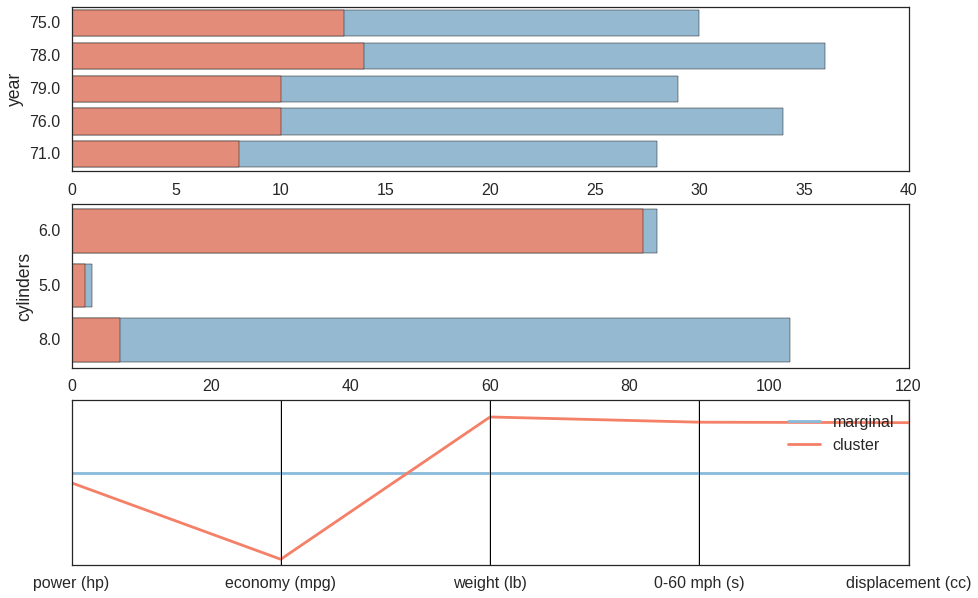

In [482]:
from clumpy.plots import quant_plot
#quant_plot('power (hp)', kmeans.labels_, 0, imputed_data)
plot_cluster_statistics(
    cluster_labels=kmeans.labels_, 
    cluster_id=3, 
    data=imputed_data, scale=True,
    quant_var=['weight (lb)', 'power (hp)', 'economy (mpg)', 'displacement (cc)', '0-60 mph (s)'],
    qual_var=['year', 'cylinders'],
    figsize=(15,10))